In [2]:
import pandas as pd
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import shap

C:\Users\TCBBILGIN\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data loading

In [3]:
train_df = pd.read_csv("Train.csv")

# Split inputs and targets
train_inputs = train_df.drop(columns=['target'])
train_targets = train_df['target']

# Select features
dropped_columns = ['device', 'id']
train_inputs.drop(columns=dropped_columns, inplace=True)

# Transform categorical features
categorical_features = ['area']
oe = OrdinalEncoder()
train_inputs[categorical_features] = oe.fit_transform(train_inputs[categorical_features])

# Missing value imputation
train_inputs.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_targets, test_size = 0.2, random_state = 0)

 97%|=================== | 33409/34274 [00:20<00:00]       

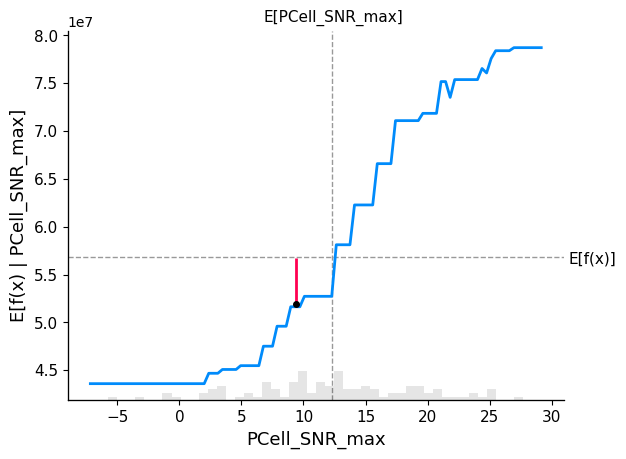

In [4]:
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(train_inputs, train_targets)
X100 = shap.utils.sample(train_inputs, 100) 

# explain the XGBoost model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(train_inputs)

sample_ind = 2

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "PCell_SNR_max",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)


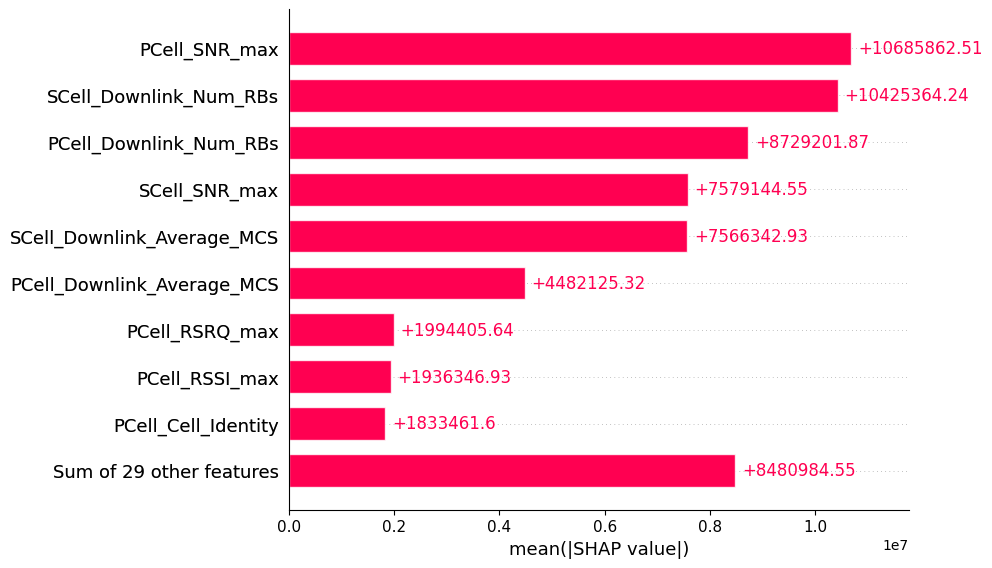

In [7]:
shap.plots.bar(shap_values_xgb)

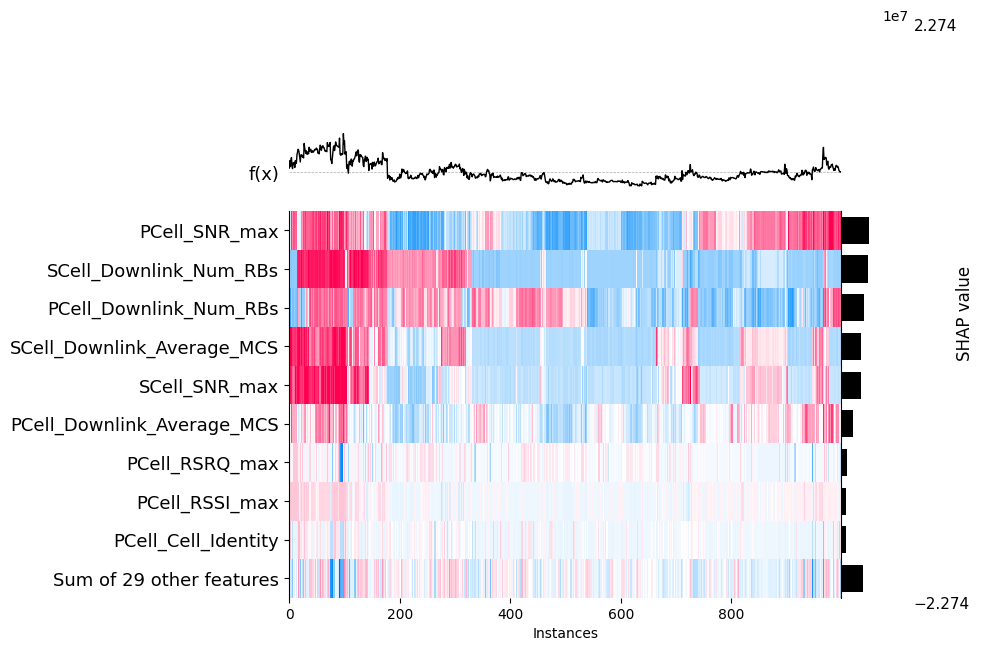

In [60]:
shap.plots.heatmap(shap_values_xgb[:1000])


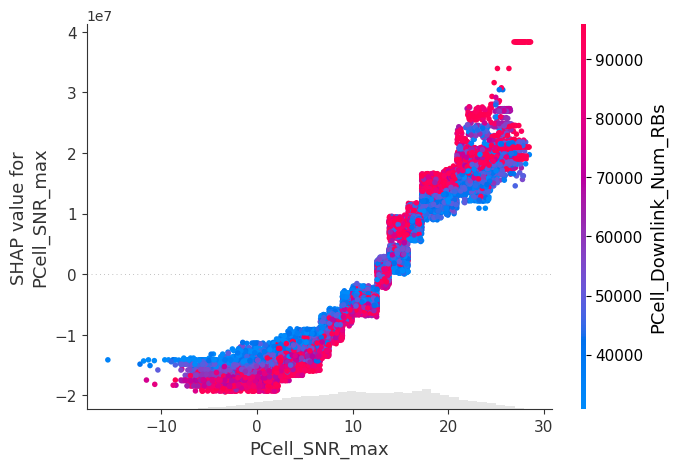

In [61]:
shap.plots.scatter(shap_values_xgb[:, "PCell_SNR_max"], color=shap_values_xgb)


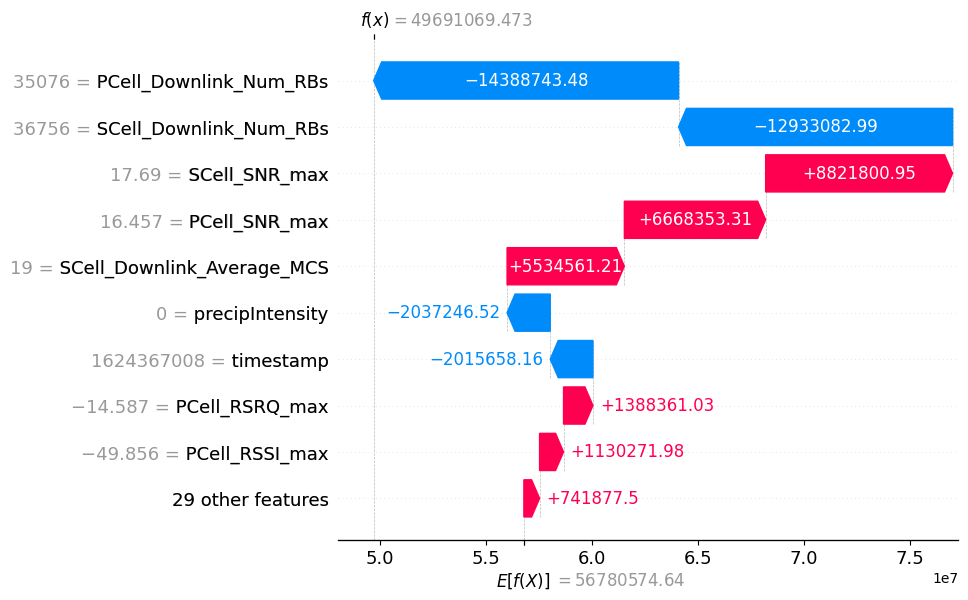

In [63]:
shap.plots.waterfall(shap_values_xgb[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


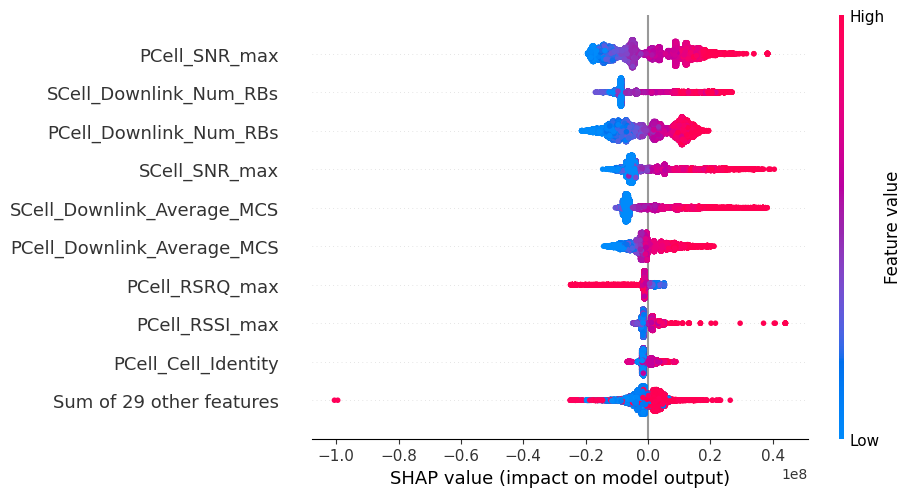

In [64]:
shap.plots.beeswarm(shap_values_xgb)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


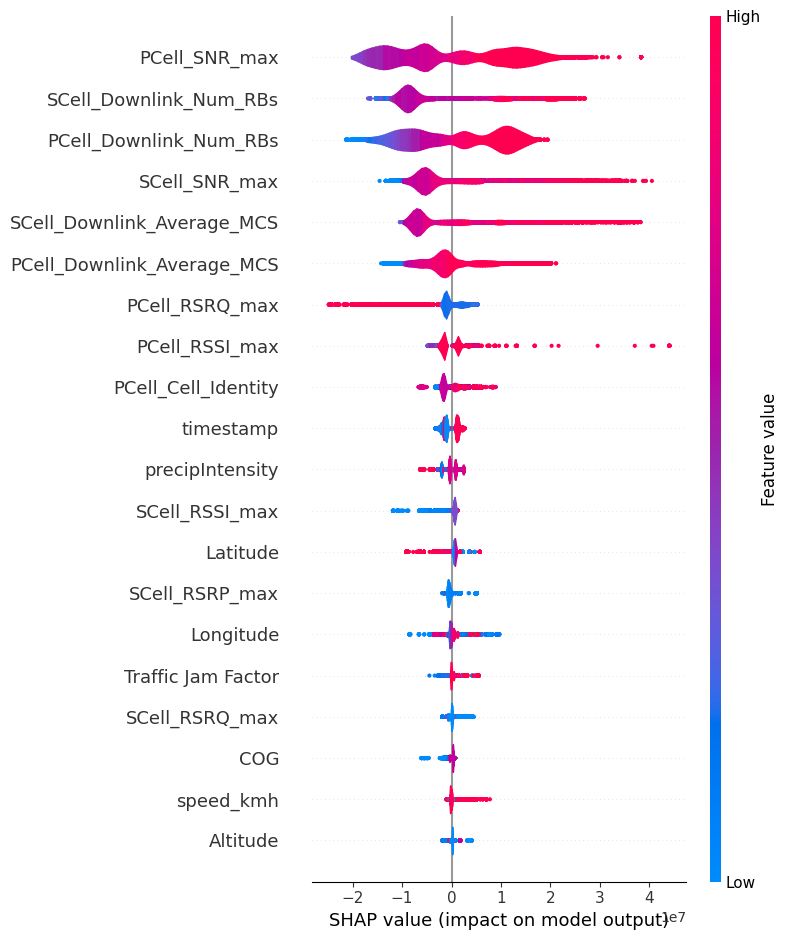

In [65]:
shap.summary_plot(shap_values_xgb, plot_type='violin')


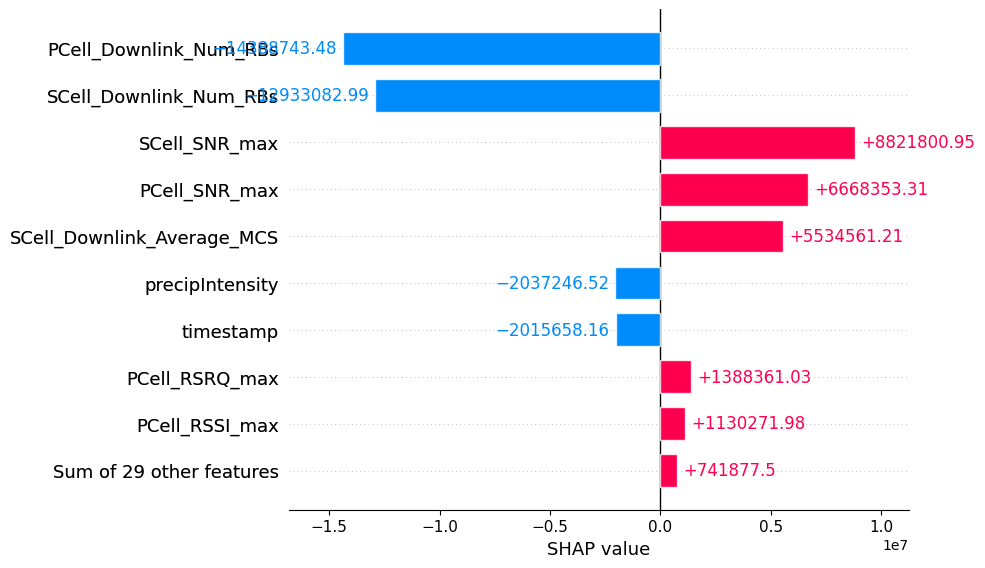

In [66]:
shap.plots.bar(shap_values_xgb[0])

In [9]:
shap.initjs()
shap.plots.force(shap_values_xgb[0], show=False,matplotlib=True )
plt.savefig('scratch.png')

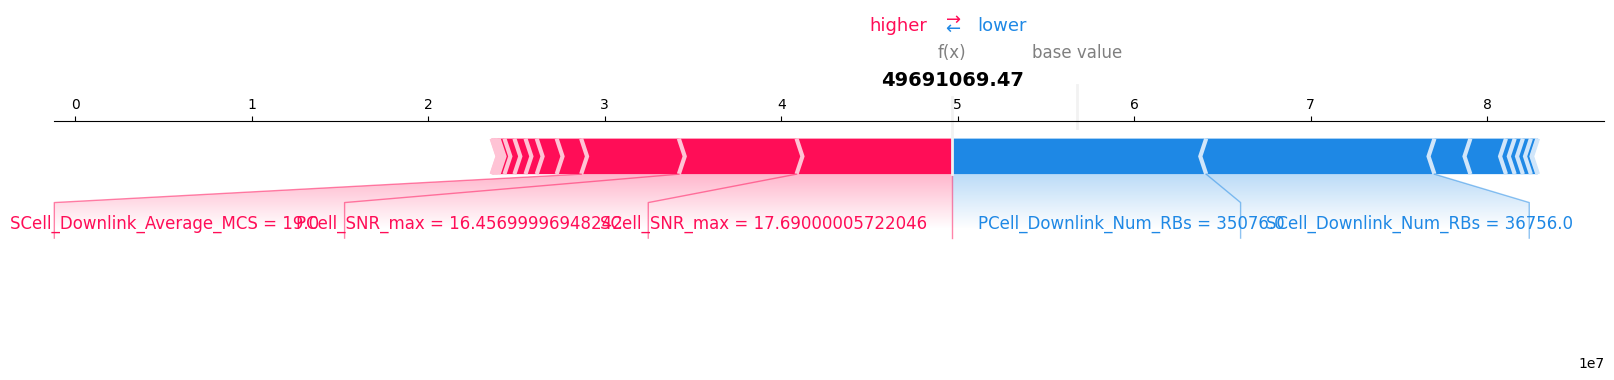

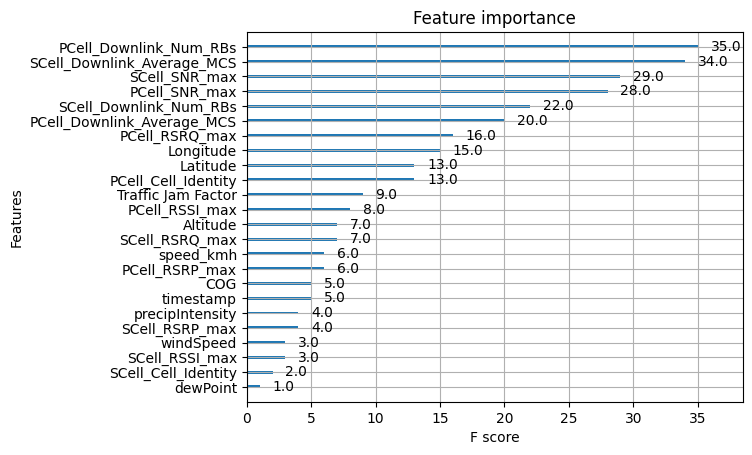

In [10]:
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()